# Remove false positives from poor SM fit due to high rotational velocity stars

Six stars have high rotational velocity, and therefore SM will try to fit the closest fit, which will be bad and basically just give it absorption features that don’t line up resulting in emission looking features in the residuals.

This eliminates 9 events.

In [70]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.io.fits as fits
from glob import glob

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 19})

plt.rcParams["figure.figsize"] = (12,7.5)


In [55]:
directory = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/6sResults/'
persistent_residuals = pd.read_csv(directory + 'r_persistent_events.csv')
stars = ['HIP67301', 'HIP677', 'HIP91919', 'HIP91926', 'HIP93747', 'HIP97649']
vsinis = [117.19, 141.39, 183.08, 123.72, 139.87, 128.68]

# Plots for Paper

In [56]:
star = 'HIP67301'
persistent_residuals[persistent_residuals['star'] == star]

,Unnamed: 0,star,identifier,r shifted wl,r unshifted wl,r heights,r AMD heights,rounded r shifted wl,observation time,rounded r unshifted wl
23,43,HIP67301,HIP67301_2,5018.383062,5016.982052,0.020335,14.247862,5018.38,2018-07-27T04:40:29.25,5016.98
24,41,HIP67301,HIP67301_1,5018.383062,5017.474439,0.016615,14.517314,5018.38,2018-07-27T04:42:19.47,5017.48
25,39,HIP67301,HIP67301_0,5018.383062,5017.381048,0.015445,14.590765,5018.38,2018-07-27T04:41:27.04,5017.38
89,37,HIP67301,HIP67301_0,5348.905360,5347.837351,0.005461,6.107899,5348.90,2018-07-27T04:41:27.04,5347.84
90,40,HIP67301,HIP67301_1,5348.905360,5347.936894,0.005243,6.060032,5348.90,2018-07-27T04:42:19.47,5347.94
91,45,HIP67301,HIP67301_2,5348.905360,5347.412077,0.009476,6.183140,5348.90,2018-07-27T04:40:29.25,5347.42
142,44,HIP67301,HIP67301_2,5598.290340,5596.727435,0.009316,6.060136,5598.30,2018-07-27T04:40:29.25,5596.72
143,42,HIP67301,HIP67301_1,5598.309340,5597.295717,0.009736,6.866624,5598.30,2018-07-27T04:42:19.47,5597.30
144,38,HIP67301,HIP67301_0,5598.309340,5597.191533,0.006309,6.536639,5598.30,2018-07-27T04:41:27.04,5597.20


In [57]:
observed_wl = 	5597.191533
rest_wl = 5598.309340	

In [58]:
apf_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/apf_data_files/'
observed_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/observed_data_files/'
rest_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/rest_data_files/'
resid_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/resid_data_files/'

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

apf_files = np.load(apf_directory + star + '.npy')
observed_files = np.load(observed_directory + star + '.npy')
rest_files = np.load(rest_directory + star + '.npy')
resid_files = np.load(resid_directory + star + '.npy')

arr = np.round(wl_image, 1) == np.round(observed_wl, 1)
order = np.where(arr)[0][0]

# Plot for Paper

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP67301_0_NDRS.fits
HIP67301
2018-07-27T04:41:27.04


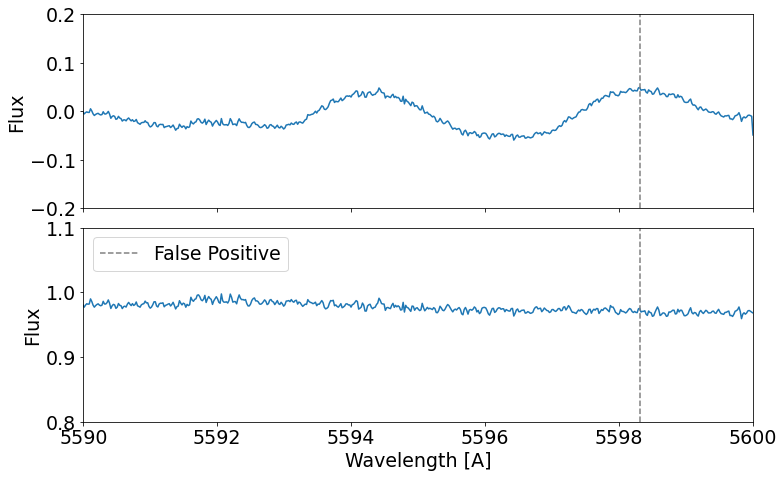

In [72]:
for file in resid_files:
    if 'HIP67301_0_NDRR' in file:
        subfile = fits.open(file)
        flux = subfile[1].data
        wl = subfile[2].data

        header = subfile[0].header
        star = header['TOBJECT']
        date = header['DATE-OBS']

        resid_wl = wl
        resid_fl = flux


for file in rest_files:
    if 'HIP67301_0_NDRS' in file:
        subfile = fits.open(file)
        flux = subfile[0].data
        wl = subfile[1].data

        header = subfile[0].header
        star = header['TOBJECT']
        date = header['DATE-OBS']
        print(file)
        print(star)
        print(date)
        # plt.xlabel('Wavelength [A]')
        # plt.ylabel('Flux')
        # plt.axvline(rest_wl, ls='--', color='gray', label='False Positive')
        # plt.plot(wl, flux)
        # plt.xlim(rest_wl - 10, rest_wl + 10)
        # plt.ylim(.9, 1.1)
        # # plt.title('SM Rest Frame Spectrum')
        # plt.legend()
        # plt.show()
        

fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=.1)

axs[0].plot(resid_wl, resid_fl)
axs[0].axvline(rest_wl, ls='--', color='gray', label='False Positive')
axs[0].set_ylim(-0.2, 0.2)
# axs[0].set_yticks(np.arange(-0.2, 0.2, 0.15))
axs[0].set_ylabel('Flux')

axs[1].plot(wl, flux)
axs[1].axvline(rest_wl, ls='--', color='gray', label='False Positive')
# axs[1].axvline(rest_wl - 0.24, ls='--', color='gray', label='False Positive')
axs[1].set_ylim(0.8, 1.1)
# axs[1].set_yticks(np.arange(0, 1.2, 0.4))
axs[1].set_ylabel('Flux')

plt.xlim(5590, 5600)
plt.xlabel('Wavelength [A]')
plt.legend()

# # Plot 1:
# fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(left=0.2, wspace=0.6)
# make_plot(axs)

# just align the last column of axes:
fig.align_ylabels(axs[0])
plt.show()

plt.show()

## Plot SM residuals in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP67301_0_NDRR.fits
HIP67301
2018-07-27T04:41:27.04


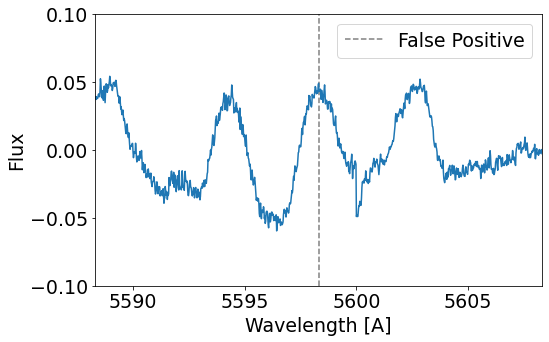

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP67301_1_NDRR.fits
HIP67301
2018-07-27T04:42:19.47


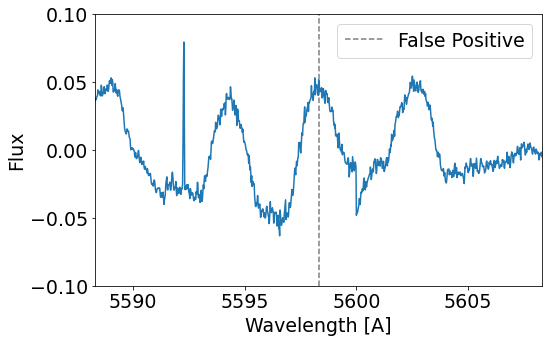

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP67301_2_NDRR.fits
HIP67301
2018-07-27T04:40:29.25


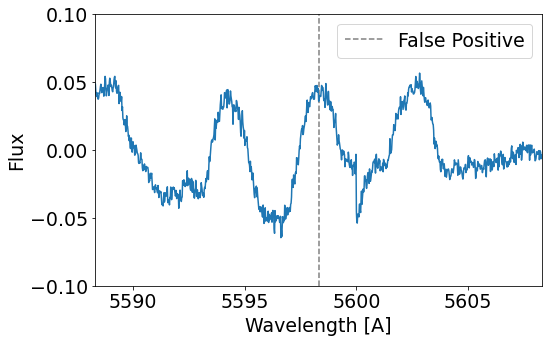

In [51]:
for file in resid_files:
    subfile = fits.open(file)
    flux = subfile[1].data
    wl = subfile[2].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray', label='False Positive')
    plt.plot(wl, flux)
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.xlim(rest_wl-10, rest_wl+10)
    plt.ylim(-.1, .1)
    # plt.title('Residual')
    plt.legend()
    plt.show()

## Plot SM spectra in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP67301_0_NDRS.fits
HIP67301
2018-07-27T04:41:27.04


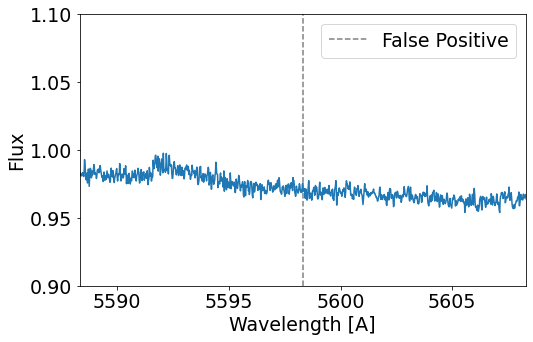

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP67301_1_NDRS.fits
HIP67301
2018-07-27T04:42:19.47


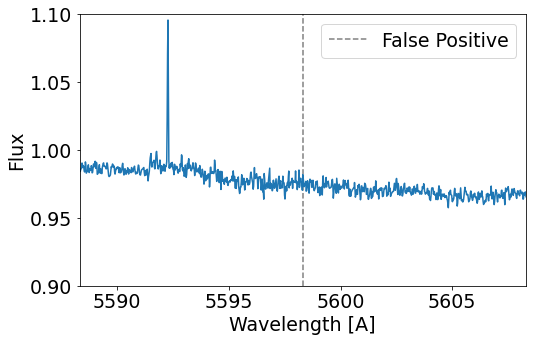

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP67301_2_NDRS.fits
HIP67301
2018-07-27T04:40:29.25


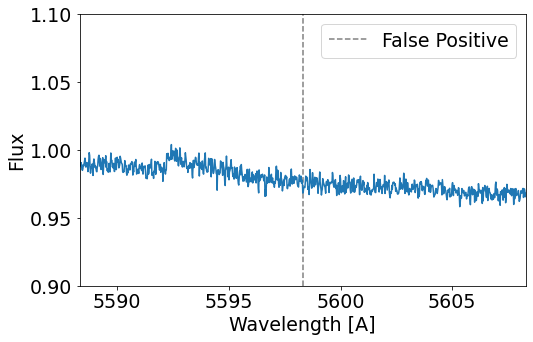

In [53]:
for file in rest_files:
    if 'NDRR' in file:
        print('skipped')
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.axvline(rest_wl, ls='--', color='gray', label='False Positive')
    plt.plot(wl, flux)
    plt.xlim(rest_wl - 10, rest_wl + 10)
    plt.ylim(.9, 1.1)
    # plt.title('SM Rest Frame Spectrum')
    plt.legend()
    plt.show()

## Plot SM spectra in observed frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP93747_1_NDRU.fits
HIP93747
2018-06-19T09:08:15.54


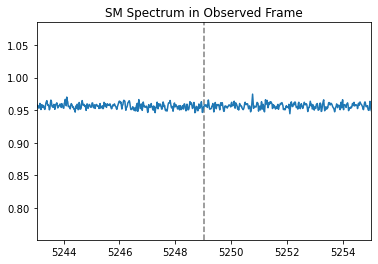

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP93747_2_NDRU.fits
HIP93747
2018-06-19T09:10:11.69


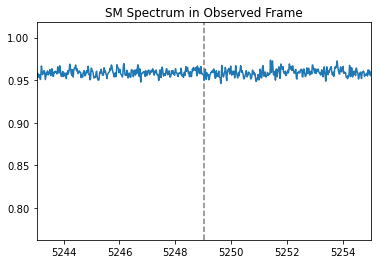

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP93747_3_NDRU.fits
HIP93747
2018-06-19T09:09:13.84


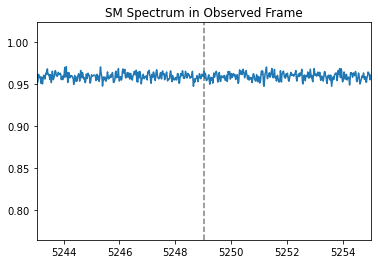

5899.98996409431
5000.005552883154


In [15]:
for file in observed_files:
    if 'NDRR' in file:
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(observed_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('SM Spectrum in Observed Frame')
    plt.show()
    print(max(wl))
    print(min(wl))

## Plot all the APF plots

HIP93747
2018-06-19T09:08:15.54
/datag/blpd0/datax/apf/rbfd.231.fits


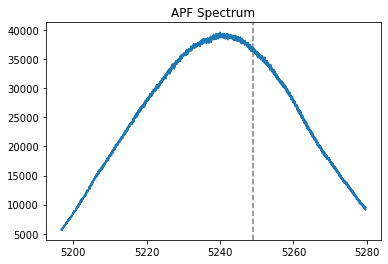

HIP93747
2018-06-19T09:10:11.69
/datag/blpd0/datax/apf/rbfd.233.fits


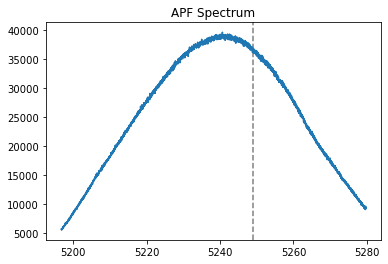

HIP93747
2018-06-19T09:09:13.84
/datag/blpd0/datax/apf/rbfd.232.fits


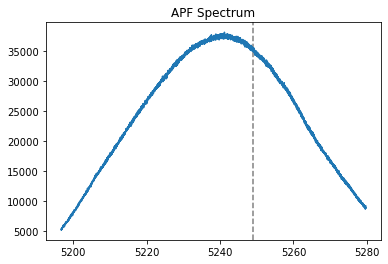

In [16]:
for file in apf_files:
    fl_file = fits.open(file)
    obj = fl_file[0].header['TOBJECT']
    date = fl_file[0].header['DATE-OBS']
    print(obj)
    print(date)
    print(file)
    fl_image = fl_file[0].data
    flux = fl_image[order][:-1]
    wl = wl_image[order]
    plt.axvline(observed_wl, ls = '--', color='gray')
    plt.plot(wl, flux)
#     plt.ylim(14000, 15000)
    # plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('APF Spectrum')
    plt.show()